In [3]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import joblib

from data_preprocessing import pipeline, filter_unnecessary_columns
from feature_preprocessing import pipeline2

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

### 데이터 전처리

In [ ]:
# 로우 데이터 불러오기
file_path = "./storage/raw_data/병합_청약매물_목록_정보_픽스2.csv"
df = pd.read_csv(file_path)

# 데이터 전처리
preprocessing_pipeline = pipeline(type='train')
df = preprocessing_pipeline.transform(df)

# 학습할 모델별로 드랍할 칼럼 정의
# - 최고당첨가점: 공급지역코드, 거래금액(만원), 공급세대수
# 최저당첨가점: 공급지역코드, 거래금액(만원), 공급세대수
# 시세차익: 공급지역코드, 공급세대수
df['시세차익'] = df['전용면적'] * df['전용면적당 시세차익']
df.drop(columns=['전용면적', '전용면적당 시세차익', '거래금액(만원)', '공급금액(최고가 기준)'], inplace=True)

# 파일 저장
file_version = "250320-01"
output_file = f"./storage/train_data/train-{file_version}.csv"
df.to_csv(output_file, index=False, encoding='cp949')

C:\Users\user\AppData\Local\Temp\ipykernel_26212\3192476883.py:3: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
c:\Users\user\mid_project\src\data_preprocessing.py:79: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['최고당첨가점'].fillna(0, inplace=True)
c:\Users\user\mid_project\src\data_preprocessing.py:80: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavi

### 모델 학습 및 평가

In [5]:
# 전처리된 데이터 가져오기

file_path = f"./storage/train_data/train-{file_version}.csv"
df = pd.read_csv(file_path, encoding='cp949')

In [6]:
X = df.drop(columns=["시세차익"])
Y = df["시세차익"]

X_train, X_test, y_train, y_test = train_test_split(
    X,  # 타겟(최저당첨가점) 제외
    Y,  # 타겟
    test_size=0.2,
    random_state=42
)

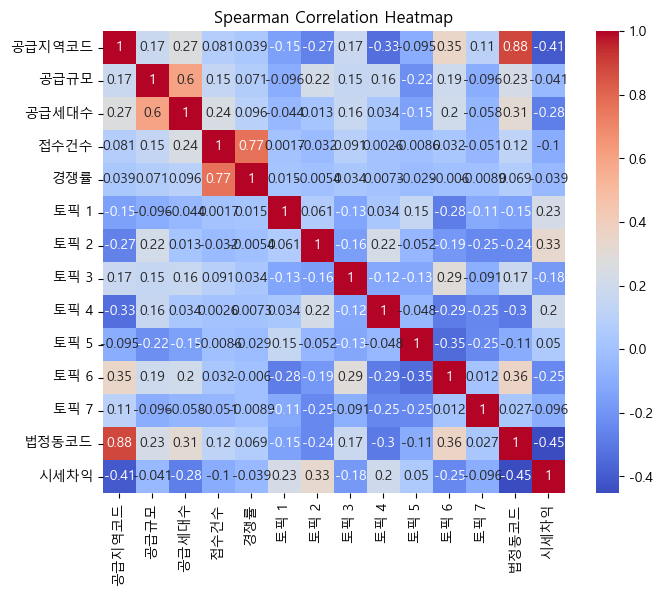

In [7]:
import seaborn as sns

# X_train과 y_train을 합치기
train_df = pd.concat([X_train, y_train], axis=1)

# numeric 열만 선택
numeric_df = train_df.select_dtypes(include=['int64', 'float64'])

# 스피어만 상관관계 계산
spearman_corr = numeric_df.corr(method='spearman')

# 히트맵 생성
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', square=True)
plt.title('Spearman Correlation Heatmap')
plt.show()

In [5]:
feature_pipeline = pipeline2()

# 학습 데이터(X_train)에 fit
feature_pipeline.fit(X)

# 학습 데이터(X_train)를 변환
X_train_transformed = feature_pipeline.transform(X)

# 테스트 데이터(X_test)를 변환
X_test_transformed = feature_pipeline.transform(X)

Index(['공급지역코드', '공급규모', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업', '공공주택지구',
       '대규모택지개발지구', '수도권내민영공공주택지구', '공급세대수', '순위', '거주지역', '접수건수', '경쟁률',
       '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7', '전용면적',
       '공급금액(최고가 기준)', '법정동코드', '거래금액(만원)', '전용면적당 시세차익'],
      dtype='object')
Index(['공급규모', '공급세대수', '접수건수', '경쟁률', '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5',
       '토픽 6', '토픽 7', '전용면적', '공급금액(최고가 기준)', '법정동코드', '거래금액(만원)',
       '전용면적당 시세차익', '투기과열지구_N', '투기과열지구_Y', '조정대상지역_N', '조정대상지역_Y',
       '분양가상한제_N', '분양가상한제_Y', '정비사업_N', '정비사업_Y', '공공주택지구_N', '공공주택지구_Y',
       '대규모택지개발지구_N', '대규모택지개발지구_Y', '거주지역_기타지역', '거주지역_해당지역', '공급지역코드_100',
       '공급지역코드_400', '공급지역코드_410', '수도권내민영공공주택지구_N', '수도권내민영공공주택지구_Y',
       '순위_1순위'],
      dtype='object')
Index(['공급지역코드', '공급규모', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업', '공공주택지구',
       '대규모택지개발지구', '수도권내민영공공주택지구', '공급세대수', '순위', '거주지역', '접수건수', '경쟁률',
       '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7', '전용면적',
    

c:\Users\user\anaconda3\envs\project-env\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\user\anaconda3\envs\project-env\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [7]:
# 피쳐 파이프라인 저장 

version = '0.0.1'
joblib.dump(feature_pipeline, f"./storage/trained_pipeline/pipeline_{version}.pkl")

['./storage/trained_pipeline/pipeline_0.0.1.pkl']

### 학습

In [1]:
# 최고당첨금액 , 최저당첨금액
'''
Randomforest, XGB, LGB 비교결과
XGB가 가장 높았지만, 성능평가에서 0.1정도의 아주 작은 차이라 더 가볍고 빠르게 돌아가는 모델인 LightGBM 이용 제안
추후 결정되면 코드 적어놓겠음
'''

'\nRandomforest, XGB, LGB 비교결과\nXGB가 가장 높았지만, 성능평가에서 0.1정도의 아주 작은 차이라 더 가볍고 빠르게 돌아가는 모델인 LightGBM 이용 제안\n추후 결정되면 코드 적어놓겠음\n'

### 모델 저장 

In [10]:
# 모델 저장 및 로드

version = 'rf_grid_0.0.1'

# 모델 저장
joblib.dump(rf_model, f"./storage/trained_model/model_{version}.pkl")

['./storage/trained_model/model_rf_grid_0.0.1.pkl']

In [8]:
# 모델 로드
loaded_model = joblib.load("./storage/trained_model/model_0.0.1.pkl")

# 예측
# X_test = np.array([[1, 2]])
# prediction = loaded_model.predict(X_test)
# print("Prediction:", prediction)